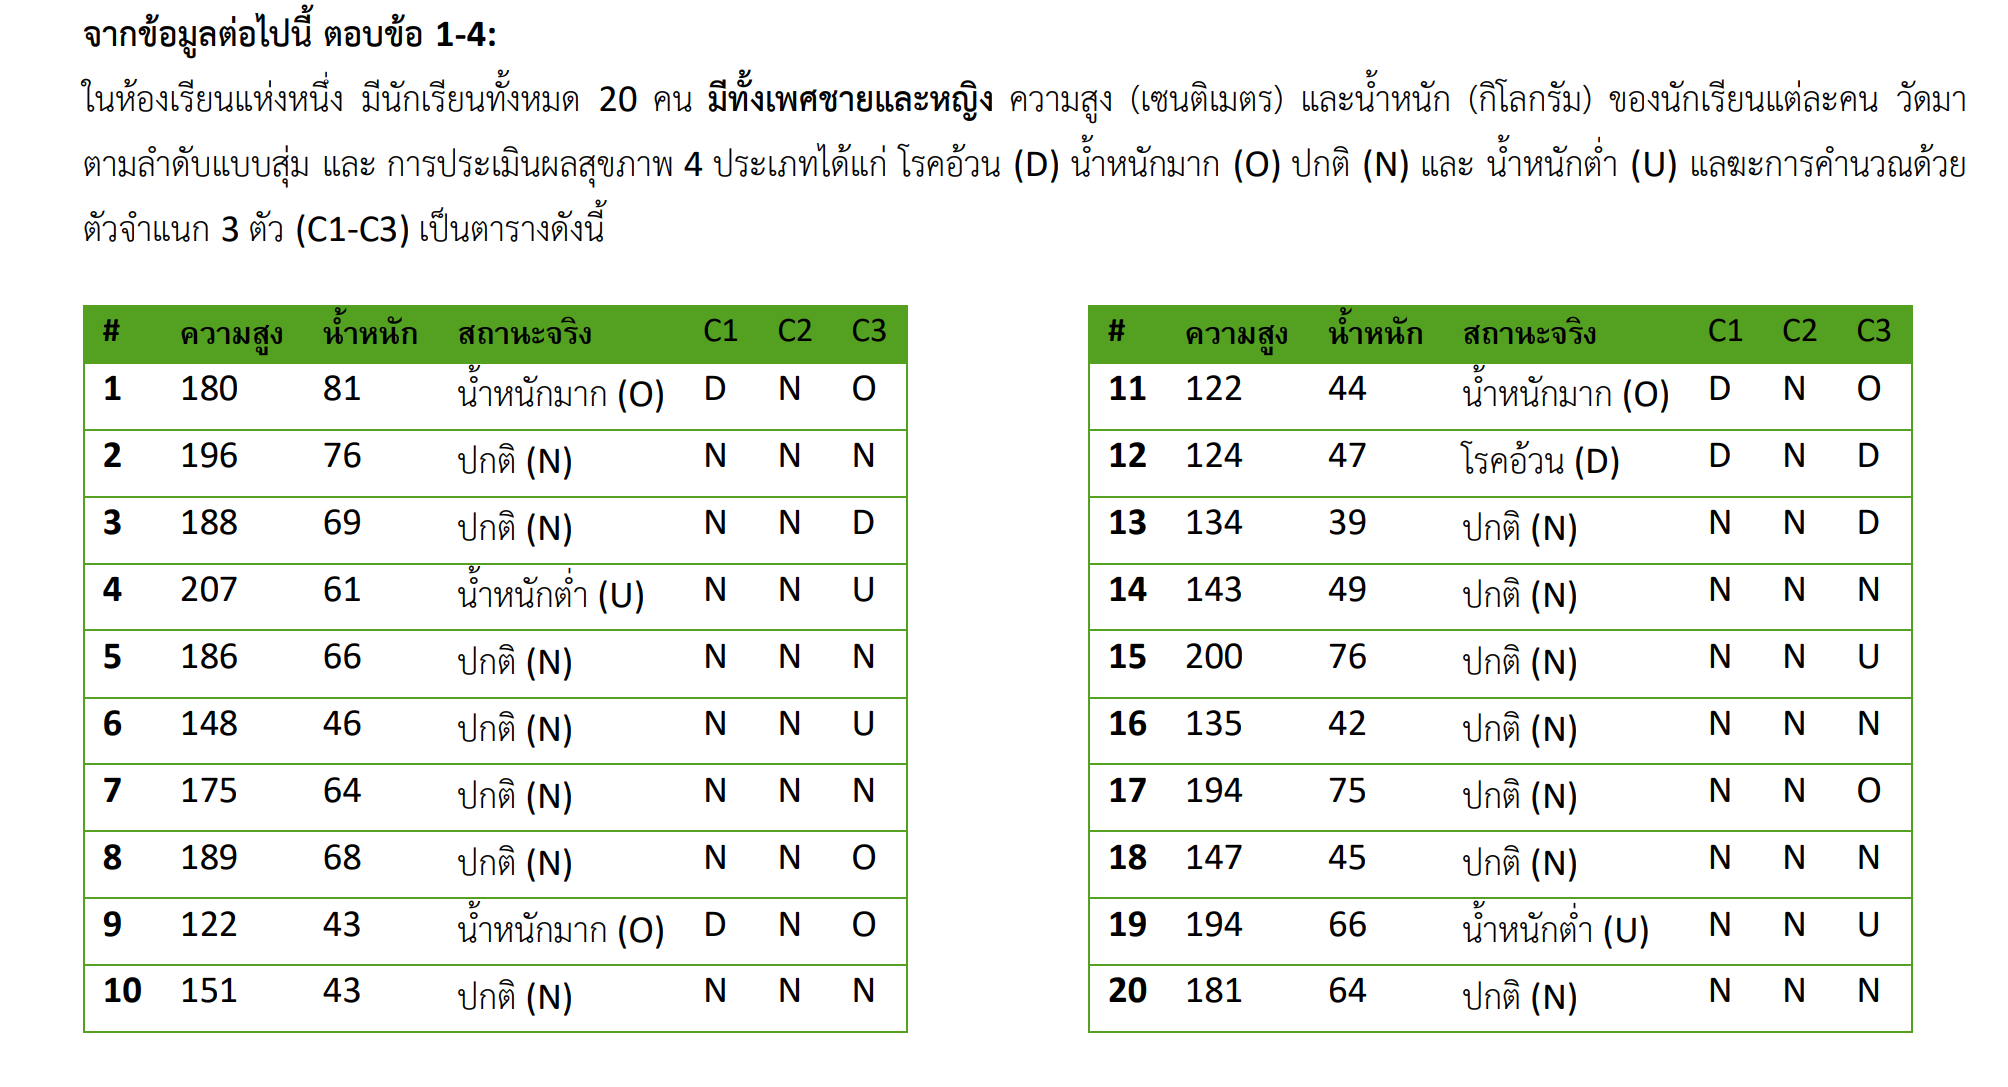

In [ ]:
import numpy as np
import pandas as pd

data = np.array([
    [180, 81], [196, 76], [189, 69], [207, 61], [186, 66],
    [148, 46], [175, 64], [189, 68], [122, 43], [151, 43],
    [122, 44], [124, 47], [134, 39], [143, 49], [200, 76],
    [135, 42], [194, 75], [147, 45], [194, 66], [181, 64]])

df = pd.DataFrame(data, columns=['Height', 'Weight'])
print(df)

    Height  Weight
0      180      81
1      196      76
2      189      69
3      207      61
4      186      66
5      148      46
6      175      64
7      189      68
8      122      43
9      151      43
10     122      44
11     124      47
12     134      39
13     143      49
14     200      76
15     135      42
16     194      75
17     147      45
18     194      66
19     181      64


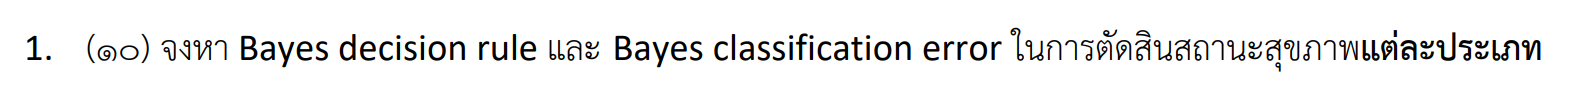

In [ ]:
target = [ 'O', 'N', 'N', 'U', 'N',   'N', 'N', 'N', 'O', 'N',   'O', 'D', 'N', 'N', 'N',   'N', 'N', 'N', 'U', 'N' ]
df['target'] = target
print(df)

    Height  Weight target
0      180      81      O
1      196      76      N
2      189      69      N
3      207      61      U
4      186      66      N
5      148      46      N
6      175      64      N
7      189      68      N
8      122      43      O
9      151      43      N
10     122      44      O
11     124      47      D
12     134      39      N
13     143      49      N
14     200      76      N
15     135      42      N
16     194      75      N
17     147      45      N
18     194      66      U
19     181      64      N


In [ ]:
df.target.unique()

array(['O', 'N', 'U', 'D'], dtype=object)

In [ ]:
for i in df.target.unique():
    print("Type= %s "%i)
    print(df[df['target']==i])

Type= O 
    Height  Weight target
0      180      81      O
8      122      43      O
10     122      44      O
Type= N 
    Height  Weight target
1      196      76      N
2      189      69      N
4      186      66      N
5      148      46      N
6      175      64      N
7      189      68      N
9      151      43      N
12     134      39      N
13     143      49      N
14     200      76      N
15     135      42      N
16     194      75      N
17     147      45      N
19     181      64      N
Type= U 
    Height  Weight target
3      207      61      U
18     194      66      U
Type= D 
    Height  Weight target
11     124      47      D


มีหลายวิธี ตัวอย่างนี้เป็นการ หาฟังก์ชันเชิงเส้น g1 (เขียว), g2 (น้ำเงิน), g3 (ส้ม) ที่สามารถ จำแนก class ได้ ซึ่งกรณีนี้สามารถเลือกเป็นเส้นตรงได้ จากข้อมูลที่พร๊อต

decision rule:

    decide D if g1(x,y)>0;
    decide O if g2(x,y)>0 & g1(x,y) <0;
    decide N if g3(x,y) >0 & g2(x,y) <0;
    else
    decide U

สำหรับ bayes classification error ในกรณีตัวอย่างจะไม่มี error เนื่องจากไม่มี likelihood ที่ทับซ้อน

คำตอบอาจมีแบบอื่นได้เช่น การใช้ตัวแปรเดียว จะทำให้มีพื้นที่ทับซ้อน ย่อมทำให้มี error ซึ่ง error ก็จะหาได้จากจำนวนข้อมูลที่ตัดสินผิด

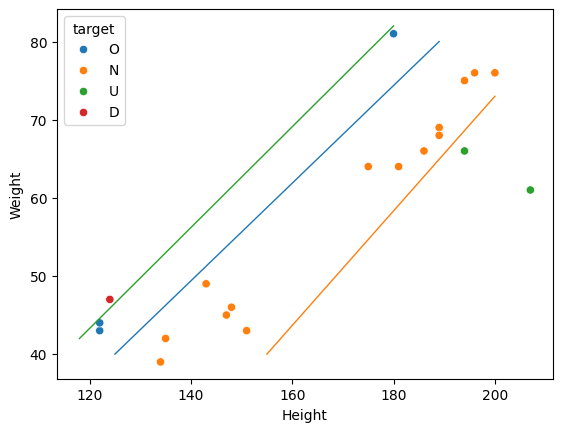

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(df, x="Height", y="Weight", hue='target')
plt.plot([125, 189], [40, 80], linewidth=1)
plt.plot([155, 200], [40, 73], linewidth=1)
plt.plot([118, 180], [42, 82], linewidth=1)

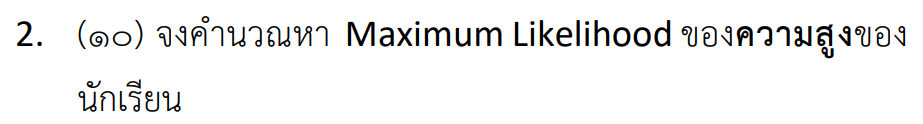

เนื่องจากข้อมูลไม่ได้มีการระบุ distribution เราจึงประเมินการกระจายด้วยการพล๊อต`

<Axes: xlabel='Height', ylabel='Count'>

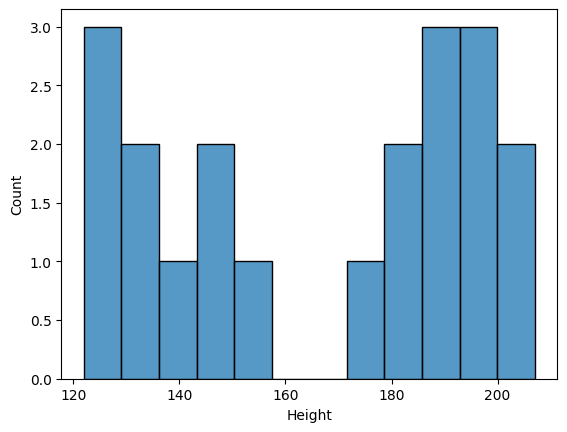

In [ ]:
import seaborn as sns
sns.histplot(df['Height'], bins=12)

สังเกตกว่า **ข้อมูลมีสองกลุ่มที่ชัดเจน** distribution ไม่ใช่ uniform แต่เป็นข้อมูลสองกลุ่ม maximum likelihood จึงควรคิดแยก cluster กรณีนี้ สามารถใช้ Height=160 เป็นการแบ่งข้อมูลได้ชัดเจน จากนั้นแล้วแต่จะมองว่าข้อมูลในแต่ละกลุ่มเป็นชนิดใด ซึ่งถ้าหากบอกว่าเป็น uniform หรือ normal ก็จะต้องหาโดยใช้ค่า mean ของ dataset

In [ ]:
mean1 = df[df['Height']<160]['Height'].mean()
mean2 = df[df['Height']>=160]['Height'].mean()
print(mean1)
print(mean2)

136.22222222222223
190.0909090909091


In [ ]:
#สถานะจริง
target = [ 'O', 'N', 'N', 'U', 'N',   'N', 'N', 'N', 'O', 'N',   'O', 'D', 'N', 'N', 'N',   'N', 'N', 'N', 'U', 'N' ]
C1     = [ 'D', 'N', 'N', 'N', 'N',   'N', 'N', 'N', 'D', 'N',   'D', 'D', 'N', 'N', 'N',   'N', 'N', 'N', 'N', 'N' ]
C2     = [ 'N', 'N', 'N', 'N', 'N',   'N', 'N', 'N', 'N', 'N',   'N', 'N', 'N', 'N', 'N',   'N', 'N', 'N', 'N', 'N' ]
C3     = [ 'O', 'N', 'D', 'U', 'N',   'U', 'N', 'O', 'O', 'N',   'O', 'D', 'D', 'N', 'U',   'N', 'O', 'N', 'U', 'N' ]


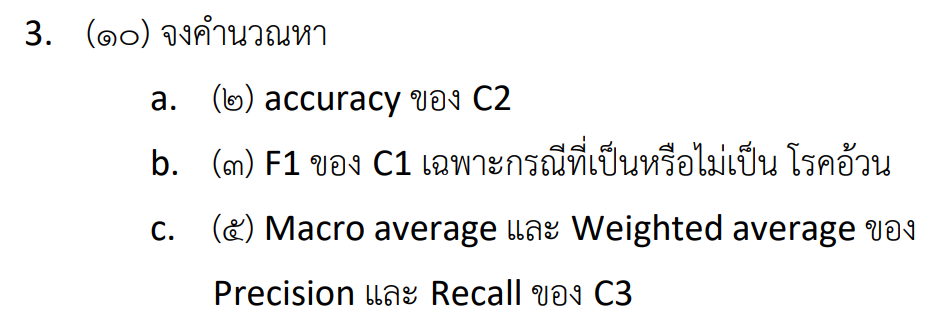

**ข้อ 3.a**.	(๒) accuracy ของ C2

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy = %s"%accuracy_score(target, C2))

accuracy = 0.7


**ข้อ 3.b.** F1 ของ C1 เฉพาะกรณีที่เป็นหรือไม่เป็น โรคอ้วน

ก่อนอื่น แปลงข้อมูลจาก U, N, O เป็น คลาสเดียวกัน (class 0) และ D เป็น class 1 จากนั้น หา F1 ตามปกติ

In [ ]:
from sklearn.metrics import f1_score
target_obese=[]
C1_obese=[]
for i in target:
    if i=='D':
        target_obese.append(1)
    else:
        target_obese.append(0)
for i in C1:
    if i=='D':
        C1_obese.append(1)
    else:
        C1_obese.append(0)
#print(target_obese)
#print(C1_obese)
print("F1 = %s"%f1_score(target_obese, C1_obese))

F1 = 0.4


**ข้อ 3.c.** Macro average และ Weighted average ของ
Precision และ Recall ของ C3

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("macro avg. recall\t= %3.4s"%recall_score (target_obese, C1_obese, average='macro'))
print("weighted avg. recall\t= %3.4s"%recall_score (target_obese, C1_obese, average='weighted'))
print("macro avg. precision\t= %3.4s"%precision_score (target_obese, C1_obese, average='macro'))
print("weighted avg. precison\t= %3.4s"%precision_score (target_obese, C1_obese, average='weighted'))

macro avg. recall	= 0.92
weighted avg. recall	= 0.85
macro avg. precision	= 0.62
weighted avg. precison	= 0.96


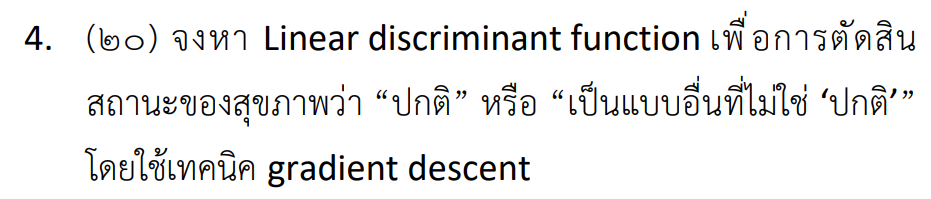

กำหนดคลาสใหม่ชื่อ status ซึ่ง
ถ้า target=='ปกติ' (N) --> status=1
ถ้า target=='ไม่ปกติ' (O, U,D ) --> status=0

In [ ]:

df.loc[df['target']=='N','status']=1
df.loc[df['target']!='N','status']=0
df

,Height,Weight,target,status
0,180,81,O,0.0
1,196,76,N,1.0
2,189,69,N,1.0
3,207,61,U,0.0
4,186,66,N,1.0
5,148,46,N,1.0
6,175,64,N,1.0
7,189,68,N,1.0
8,122,43,O,0.0
9,151,43,N,1.0


In [ ]:
# ref from https://blog.paperspace.com/part-1-generic-python-implementation-of-gradient-descent-for-nn-optimization/
import numpy

def sigmoid(sop):
    return 1.0/(1+numpy.exp(-1*sop))

learning_rate = 0.01
#initiialize w1, w2

w1=1
w2=1
print("Initial W : ", w1, w2) # try w1=0, w2=0

# ปกติกำหนดต่ำกว่านี้ แต่ไม่รอด
theta = 0.25
log=[]

for epoch in range(80000):

    # batch error
    error=0

    for index, row in df.iterrows():
        target=row['status']
        x1=row['Height']
        x2=row['Weight']

        ## Forward pass
        y = w1*x1 + w2*x2
        predicted = sigmoid(y)
        error = error + numpy.power(predicted - target, 2)

        ## Backward pass
        # g1 = d_error / d_predicted
        g1 = 2*(predicted - target)

        #g2 = d_predicted / d_y
        g2 = sigmoid(predicted)*(1.0-sigmoid(predicted))

        #g3 = d_y / d_w
        #note: w is a vector. y is an data item.
        g3_w1 = x1
        g3_w2 = x2

        #gradient w1, w2 (apply chain rule)
        # gradient (d_error / dw)  = g1*g2*g3 = (d_error / d_predicted) * (d_predicted / d_y) * (d_y / d_w) ==> (d_error / d_w)
        gradient_w1 = g1 * g2 * g3_w1
        gradient_w2 = g1 * g2 * g3_w2

        #update weight
        w1 = w1 - learning_rate * gradient_w1
        w2 = w2 - learning_rate * gradient_w2

    # error per epoch = average error by size of training batch
    error = error / len(df.index)

    log.append([epoch, error])

    print("epech=%4s; error=%3.4s; [ w1, w2 ] = [ %3.4s, %3.4s ]"%(epoch, error, w1, w2))

    if error < theta:
        break



Initial W :  1 1
epech=   0; error=0.39; [ w1, w2 ] = [ 0.26, 0.68 ]
epech=   1; error=0.44; [ w1, w2 ] = [ 0.50, 0.74 ]
epech=   2; error=0.44; [ w1, w2 ] = [ 0.56, 0.69 ]
epech=   3; error=0.50; [ w1, w2 ] = [ 0.25, 0.47 ]
epech=   4; error=0.44; [ w1, w2 ] = [ 0.50, 0.54 ]
epech=   5; error=0.44; [ w1, w2 ] = [ 0.56, 0.49 ]
epech=   6; error=0.44; [ w1, w2 ] = [ 0.63, 0.44 ]
epech=   7; error=0.44; [ w1, w2 ] = [ 0.69, 0.39 ]
epech=   8; error=0.45; [ w1, w2 ] = [ 0.74, 0.30 ]
epech=   9; error=0.44; [ w1, w2 ] = [ 0.76, 0.20 ]
epech=  10; error=0.45; [ w1, w2 ] = [ 0.78, 0.11 ]
epech=  11; error=0.41; [ w1, w2 ] = [ 0.46, -0.0 ]
epech=  12; error=0.44; [ w1, w2 ] = [ 0.70, 0.02 ]
epech=  13; error=0.44; [ w1, w2 ] = [ 0.77, -0.0 ]
epech=  14; error=0.44; [ w1, w2 ] = [ 0.83, -0.0 ]
epech=  15; error=0.44; [ w1, w2 ] = [ 0.88, -0.1 ]
epech=  16; error=0.41; [ w1, w2 ] = [ 0.58, -0.2 ]
epech=  17; error=0.44; [ w1, w2 ] = [ 0.82, -0.2 ]
epech=  18; error=0.44; [ w1, w2 ] = [ 0.89, -0

      epoch     error
0         0  0.400000
1         1  0.450000
2         2  0.449949
3         3  0.501926
4         4  0.450000
...     ...       ...
2383   2383  0.399145
2384   2384  0.419703
2385   2385  0.444509
2386   2386  0.399987
2387   2387  0.242455

[2388 rows x 2 columns]


<Axes: xlabel='epoch', ylabel='error'>

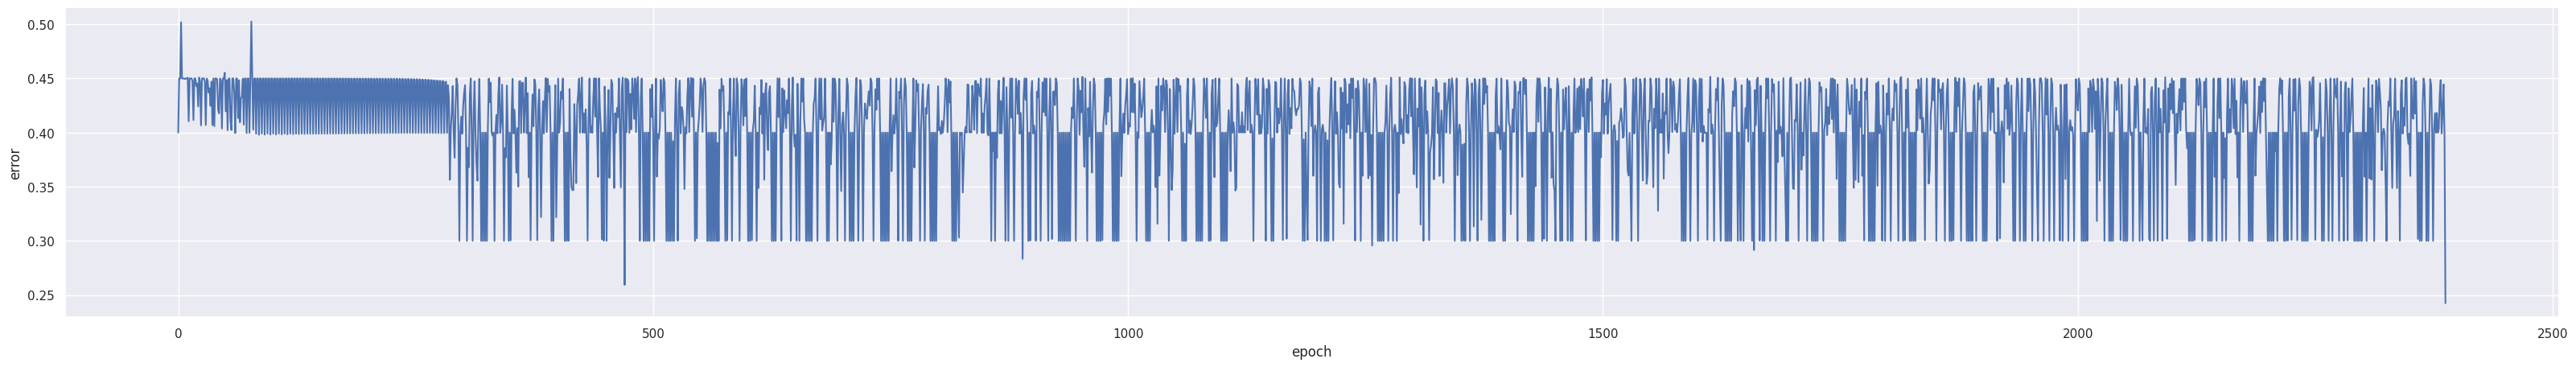

In [ ]:
df2=pd.DataFrame(log, columns=['epoch', 'error'])
print(df2)
sns.set(rc={'figure.figsize':(40,5)})
sns.lineplot(data=df2, x="epoch", y="error")

In [ ]:
j=0
error=0
print(w1,w2)
for index, row in df.iterrows():
    y = w1*row['Height']+ w2*row['Weight']
    predicted = sigmoid(y)
    print("height=%3.4s, row=%3.4s\t predicted=%3.4s, truth=%3.4s"%(row['Height'], row['Weight'], predicted, row['status']))
    error=error+predicted-row['status']

print("error = %3.4s"%(error/len(df.index)))

1.2793062264858301 -3.0810833447487522
height=180, row= 81	 predicted=4.18, truth=0.0
height=196, row= 76	 predicted=0.99, truth=1.0
height=189, row= 69	 predicted=0.99, truth=1.0
height=207, row= 61	 predicted=1.0, truth=0.0
height=186, row= 66	 predicted=0.99, truth=1.0
height=148, row= 46	 predicted=1.0, truth=1.0
height=175, row= 64	 predicted=0.99, truth=1.0
height=189, row= 68	 predicted=0.99, truth=1.0
height=122, row= 43	 predicted=0.99, truth=0.0
height=151, row= 43	 predicted=1.0, truth=1.0
height=122, row= 44	 predicted=0.99, truth=0.0
height=124, row= 47	 predicted=0.99, truth=0.0
height=134, row= 39	 predicted=1.0, truth=1.0
height=143, row= 49	 predicted=0.99, truth=1.0
height=200, row= 76	 predicted=0.99, truth=1.0
height=135, row= 42	 predicted=1.0, truth=1.0
height=194, row= 75	 predicted=0.99, truth=1.0
height=147, row= 45	 predicted=1.0, truth=1.0
height=194, row= 66	 predicted=1.0, truth=0.0
height=181, row= 64	 predicted=0.99, truth=1.0
error = 0.24


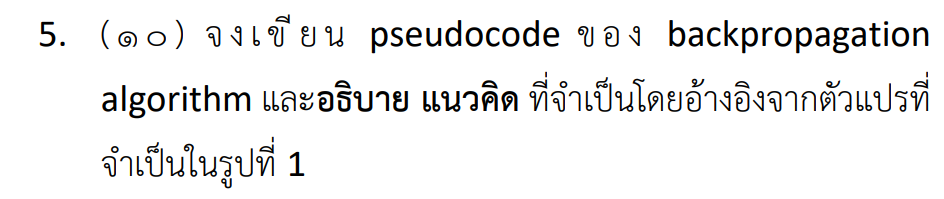

การพิจารณาคำตอบ ดูจากความเข้าใจเป็นหลักครับ ไม่ต้องตอบเป๊ะตามนี้ก็ได้

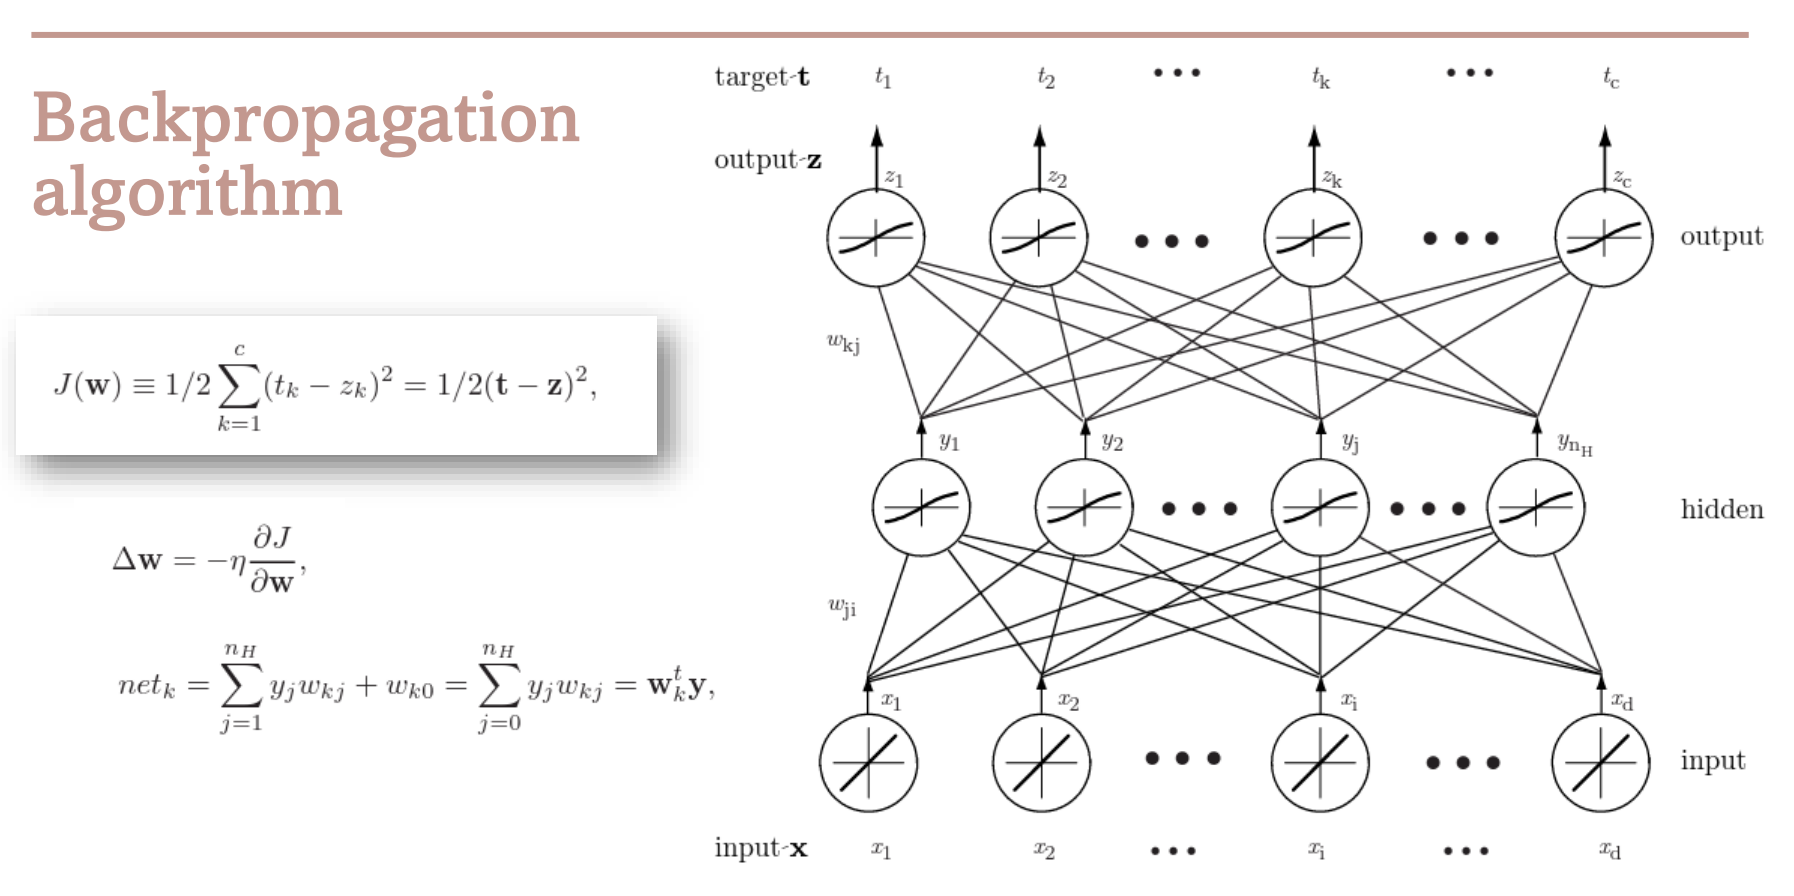

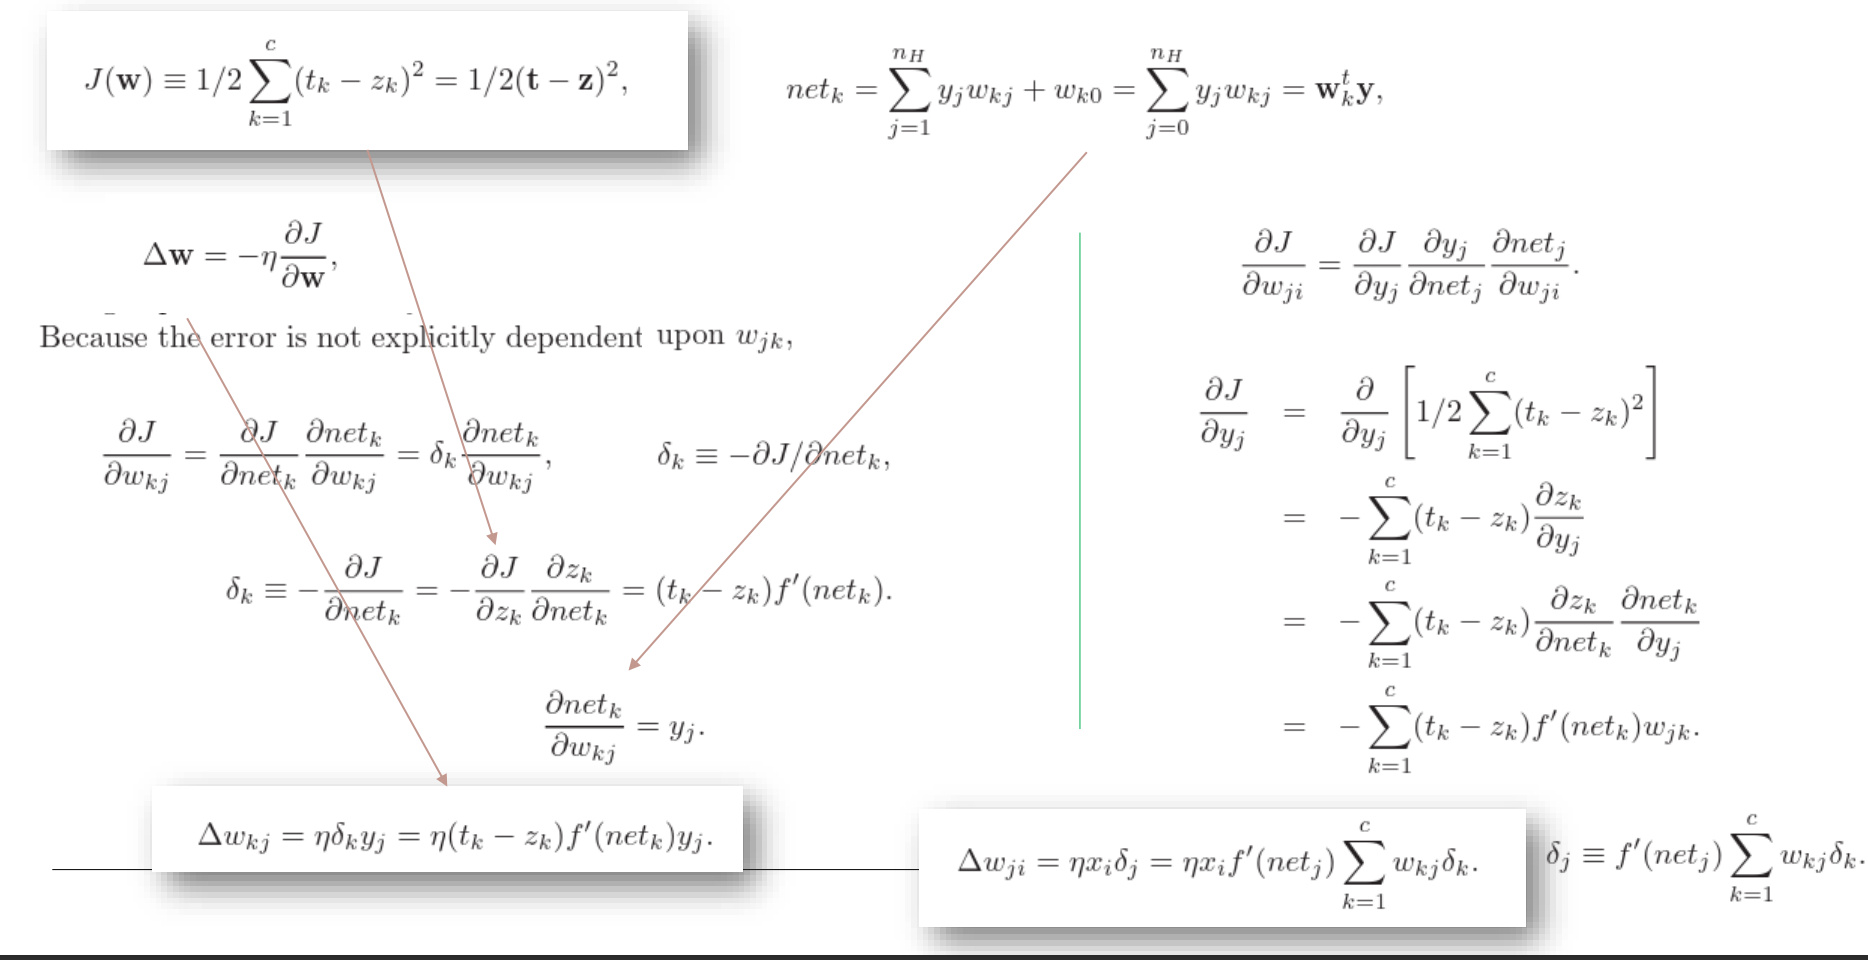

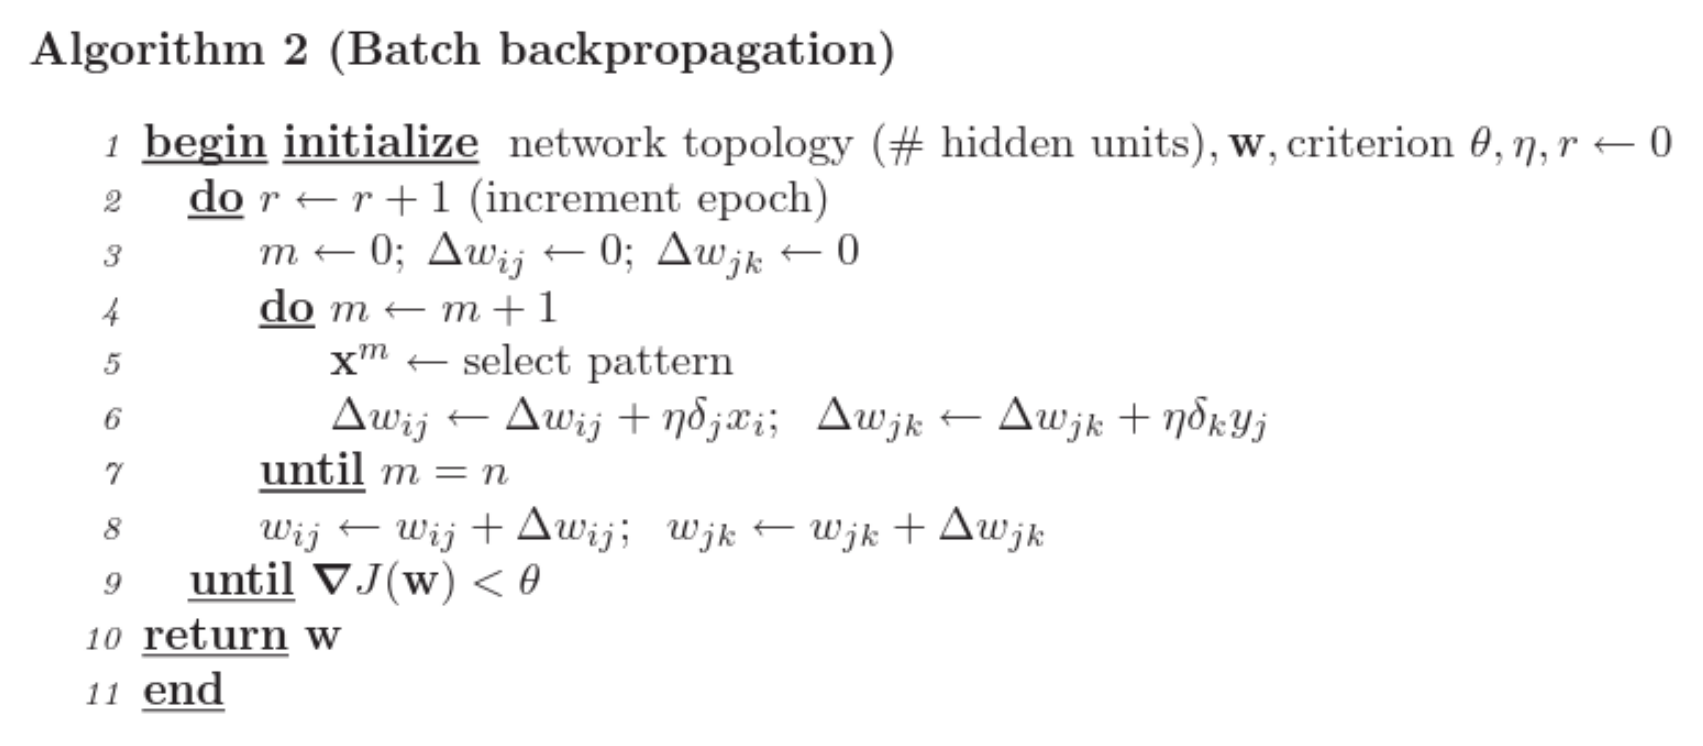